## Measuring growth of industries state-wise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Read cleaned data from inc_cleaned_data.csv file.

In [2]:
state_df = pd.read_csv('inc_cleaned_data.csv', sep='|')

In [3]:
state_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA


---

Calculate previous revenue i.e. of 2013 for each company and store in separate dataframe column prev_revenue. It will be used to find growth % of state groups.

In [4]:
state_df.loc[:,('prev_revenue')] = state_df.apply(lambda x: (100/(x['growth']+100)) * x['revenue'], axis=1).values

In [5]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 10 columns):
rank            4997 non-null int64
name            4997 non-null object
revenue         4997 non-null float64
industry        4993 non-null object
employees       4861 non-null float64
founded         4994 non-null float64
growth          4997 non-null int64
city            4996 non-null object
state           4997 non-null object
prev_revenue    4997 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 390.5+ KB


The new column can be seen in the dataframe.

In [6]:
state_df.head()

,rank,name,revenue,industry,employees,founded,growth,city,state,prev_revenue
0,1,Skillz,54.2,Software,58.0,2012.0,50059,San Francisco,CA,0.108056
1,2,EnviroSolar Power,37.4,Energy,85.0,2012.0,36065,Fort Worth,TX,0.103415
2,3,Gametime,48.8,Consumer Products & Services,75.0,2013.0,34021,San Francisco,CA,0.143020
3,4,Club Pilates Franchise,26.8,Consumer Products & Services,31.0,2007.0,21319,Costa Mesa,CA,0.125123
4,5,Halo Top Creamery,49.1,Food & Beverage,10.0,2012.0,20944,Los Angeles,CA,0.233321


---

Evaluate state-wise revenues of 2016 and 2013 i.e. current and previous revenues.

In [7]:
state_group_df = state_df.groupby('state').sum().sort_values(by='revenue', ascending=False)[['revenue','prev_revenue']]
state_group_df

,revenue,prev_revenue
state,,
CA,27032.8,10475.686546
CT,26770.6,15706.624367
TX,20308.9,8335.269555
NY,15536.3,7734.372436
FL,12557.1,5085.871478
VA,10166.9,4411.613214
OH,10159.1,5185.844466
GA,9029.9,4074.054640
IL,8885.0,4225.483529


---

### Calculate state-wise growth in %.

In [8]:
state_growth = state_group_df.apply(lambda x: ((x['revenue']-x['prev_revenue'])/x['prev_revenue'])*100, axis=1).sort_values(ascending=False)
state_growth

state
MT    309.454893
ME    299.326029
WV    287.365842
PR    217.374408
HI    214.651387
AR    198.596460
NE    198.079810
NM    191.444143
VT    179.192129
DC    176.083047
NC    171.968213
AL    160.239708
OK    160.198090
UT    160.146700
CA    158.052777
NJ    153.356201
OR    152.368959
SC    150.244223
FL    146.901638
NV    146.315600
MO    144.519388
TX    143.650189
IA    134.266965
AZ    132.991825
MI    131.140280
WA    131.097694
VA    130.457647
ND    130.081927
LA    128.303818
SD    127.054504
GA    121.644057
WY    120.705523
KS    119.955574
NH    118.860813
MD    117.411284
ID    111.131426
IL    110.271794
DE    106.972120
TN    101.718961
NY    100.873440
PA     99.533475
CO     99.493786
IN     98.695140
MN     97.786652
OH     95.900592
WI     91.516586
AK     91.000000
MA     81.480051
MS     72.928322
KY     71.956600
CT     70.441461
RI     51.817758
dtype: float64

---

### How many companies does each state contributes to 5000 list?

In [10]:
state_count = state_df.groupby('state')['industry'].count().sort_values(ascending=False)
state_count

state
CA    670
TX    425
FL    368
NY    307
VA    289
IL    238
GA    233
PA    185
OH    172
MA    146
NJ    140
NC    124
MD    121
AZ    120
WA    116
CO    114
UT    110
MI    101
MN     86
TN     86
MO     81
IN     67
OR     66
AL     59
SC     58
WI     53
LA     46
DC     44
KY     36
KS     35
CT     34
OK     28
IA     28
NV     28
NE     25
NH     22
DE     16
AR     14
ID     14
MS     13
ME     12
SD     11
ND      9
MT      8
RI      8
HI      7
WV      6
WY      4
NM      4
PR      3
VT      2
AK      1
Name: industry, dtype: int64

---

### Finding most growing industry in each state with growth %.

In [11]:
for x in state_df.groupby('state'):
    temp = x[1].groupby('industry').apply(lambda y: ((y['revenue'].sum()-y['prev_revenue'].sum())/y['prev_revenue'].sum())*100).sort_values(ascending=False)
    print("{}\t{:30}\t{:>10}".format(x[0], temp.index[0], round(temp.values[0], 1)))

AK	Health                        	      91.0
AL	Energy                        	    2732.0
AR	Retail                        	    3983.1
AZ	Education                     	     874.0
CA	Security                      	     292.5
CO	Logistics & Transportation    	    2074.2
CT	Food & Beverage               	     665.0
DC	Energy                        	     742.9
DE	Business Products & Services  	    2441.0
FL	Media                         	     415.7
GA	Travel & Hospitality          	     542.7
HI	Construction                  	     551.8
IA	Energy                        	     550.0
ID	Retail                        	     606.9
IL	Energy                        	    1317.0
IN	Advertising & Marketing       	     257.5
KS	Human Resources               	     296.0
KY	Insurance                     	    2231.0
LA	Energy                        	    2079.0
MA	Consumer Products & Services  	     646.2
MD	Food & Beverage               	     438.5
ME	Business Products & Services  	    9204.0
MI	Enginee

---

### United States map with state wise growth %

Shape file has full state names while the dataframe has state names in two letter codes. 

In [12]:
state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'American Samoa': 'AS',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'National': 'NA',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Virgin Islands': 'VI',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [19]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

Basemap object for United States map

In [20]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

Setting background white for US map.

In [21]:
sns.set_style(style='white')

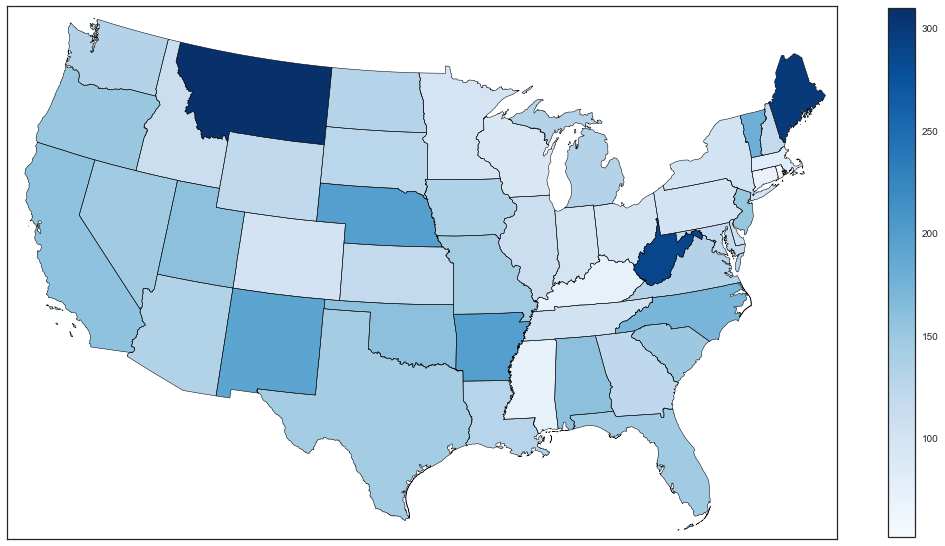

In [22]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_axes([0.1,0.1,0.9,0.9])

# Read shape file for US state map.
m.readshapefile('shape_files/st99_d00', name='states', drawbounds=True)

# state_names list is storing State names in the same order as in m.states_info list.
# The map is divided into 273 polygons with some states being covered by multiple polygons. Hence repeatitions of state
# names in list.
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['NAME'])

# values_list will store growth % of states in the same order as respective state names in state_names. 
# values_array is array version of values array.
# m.states contain map information for states in same order as m.states_info.
# Now m.states, m.states_info, state_names and values_array have same order.
values_list = []
for state in state_names:
    values_list.append(state_growth[state_codes[state]])
values_array = np.array(values_list)    

# Adding all the polygons at once to the map.
coll = PolyCollection(m.states, array=values_array, cmap='Blues', edgecolors='none')
ax.add_collection(coll)
ax.autoscale_view()

# Adding colorbar for the PolyCollection
fig.colorbar(coll, ax=ax, shrink=0.51)

---

### United States map with count of companies from each state

In [23]:
m2 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

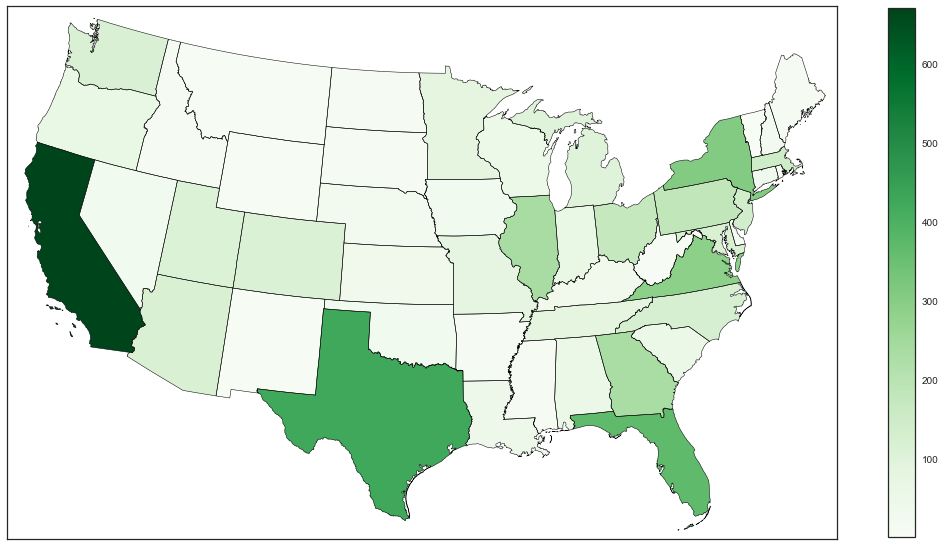

In [26]:
fig2 = plt.figure(figsize=(16,16))
ax2 = fig2.add_axes([0.1,0.1,0.9,0.9])

# Read shape file for US state map.
m2.readshapefile('shape_files/st99_d00', name='states', drawbounds=True)

# state_names list is storing State names in the same order as in m.states_info list.
# The map is divided into 273 polygons with some states being covered by multiple polygons. Hence repeatitions of state
# names in list.
state_names = []
for shape_dict in m2.states_info:
    state_names.append(shape_dict['NAME'])

# values_list will store count of companies of states in the same order as respective state names in state_names. 
# values_array is array version of values array.
# m.states contain map information for states in same order as m.states_info.
# Now m.states, m.states_info, state_names and values_array have same order.
values_list = []
for state in state_names:
    values_list.append(state_count[state_codes[state]])
values_array = np.array(values_list)    

# Adding all the polygons at once to the map.
coll = PolyCollection(m2.states, array=values_array, cmap='Greens', edgecolors='none')
ax2.add_collection(coll)
ax2.autoscale_view()

# Adding colorbar for the PolyCollection
fig2.colorbar(coll, ax=ax2, shrink=0.51)